<a href="https://colab.research.google.com/github/SumitDS23/Capstone-Project-34/blob/main/HRPvsHERC_NIFTY50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Riskfolio-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 12.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

In [3]:
path="https://github.com/SumitDS23/Capstone-Project-34/raw/main/Nifty_50.csv"

In [4]:
dataset=pd.read_csv(path,index_col=0)
dataset

,HDFCBANK.NS,RELIANCE.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TCS.NS,AXISBANK.NS,KOTAKBANK.NS,BHARTIARTL.NS
2019-07-01,1242.775024,1256.935547,439.000000,731.299988,274.950012,1556.650024,2239.550049,810.450012,1481.199951,348.500000
2019-07-02,1247.500000,1266.494873,436.750000,740.000000,273.850006,1563.849976,2252.100098,802.599976,1471.500000,353.600006
2019-07-03,1244.824951,1270.506836,435.950012,731.299988,276.700012,1578.050049,2237.649902,806.200012,1475.000000,353.200012
2019-07-04,1241.900024,1271.943237,436.200012,733.799988,277.649994,1571.699951,2242.649902,808.849976,1497.800049,362.750000
2019-07-05,1236.199951,1251.487183,436.350006,718.000000,279.450012,1558.349976,2163.100098,806.099976,1517.199951,364.799988
...,...,...,...,...,...,...,...,...,...,...
2023-06-22,1643.599976,2535.500000,925.750000,1281.550049,447.649994,2416.250000,3238.500000,966.599976,1836.099976,842.799988
2023-06-23,1643.500000,2514.750000,923.500000,1265.000000,444.750000,2389.550049,3216.350098,958.400024,1828.550049,854.799988
2023-06-26,1635.550049,2495.550049,927.450012,1270.349976,445.700012,2377.550049,3189.649902,960.549988,1822.949951,851.950012
2023-06-27,1658.599976,2496.449951,936.099976,1279.150024,445.100006,2388.050049,3197.350098,973.250000,1844.699951,864.900024


In [5]:
dataset=dataset.rename(columns={"Unnamed: 0":"Date"})

In [6]:
dataset

,HDFCBANK.NS,RELIANCE.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TCS.NS,AXISBANK.NS,KOTAKBANK.NS,BHARTIARTL.NS
2019-07-01,1242.775024,1256.935547,439.000000,731.299988,274.950012,1556.650024,2239.550049,810.450012,1481.199951,348.500000
2019-07-02,1247.500000,1266.494873,436.750000,740.000000,273.850006,1563.849976,2252.100098,802.599976,1471.500000,353.600006
2019-07-03,1244.824951,1270.506836,435.950012,731.299988,276.700012,1578.050049,2237.649902,806.200012,1475.000000,353.200012
2019-07-04,1241.900024,1271.943237,436.200012,733.799988,277.649994,1571.699951,2242.649902,808.849976,1497.800049,362.750000
2019-07-05,1236.199951,1251.487183,436.350006,718.000000,279.450012,1558.349976,2163.100098,806.099976,1517.199951,364.799988
...,...,...,...,...,...,...,...,...,...,...
2023-06-22,1643.599976,2535.500000,925.750000,1281.550049,447.649994,2416.250000,3238.500000,966.599976,1836.099976,842.799988
2023-06-23,1643.500000,2514.750000,923.500000,1265.000000,444.750000,2389.550049,3216.350098,958.400024,1828.550049,854.799988
2023-06-26,1635.550049,2495.550049,927.450012,1270.349976,445.700012,2377.550049,3189.649902,960.549988,1822.949951,851.950012
2023-06-27,1658.599976,2496.449951,936.099976,1279.150024,445.100006,2388.050049,3197.350098,973.250000,1844.699951,864.900024


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2019-07-01 to 2023-06-28
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HDFCBANK.NS    991 non-null    float64
 1   RELIANCE.NS    991 non-null    float64
 2   ICICIBANK.NS   991 non-null    float64
 3   INFY.NS        991 non-null    float64
 4   ITC.NS         991 non-null    float64
 5   LT.NS          991 non-null    float64
 6   TCS.NS         991 non-null    float64
 7   AXISBANK.NS    991 non-null    float64
 8   KOTAKBANK.NS   991 non-null    float64
 9   BHARTIARTL.NS  991 non-null    float64
dtypes: float64(10)
memory usage: 85.2+ KB


In [8]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())
dataset.shape

Null Values = False


(991, 10)

In [9]:
dataset.isnull().sum()/len(dataset)

HDFCBANK.NS      0.0
RELIANCE.NS      0.0
ICICIBANK.NS     0.0
INFY.NS          0.0
ITC.NS           0.0
LT.NS            0.0
TCS.NS           0.0
AXISBANK.NS      0.0
KOTAKBANK.NS     0.0
BHARTIARTL.NS    0.0
dtype: float64

In [10]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

missing_fractions.head(10)

drop_list = sorted(list(missing_fractions[missing_fractions > 0.4].index))

dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(991, 10)

In [11]:
# Fill the missing values with the last value available in the dataset.
dataset=dataset.fillna(method='ffill')
dataset.head()

,HDFCBANK.NS,RELIANCE.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TCS.NS,AXISBANK.NS,KOTAKBANK.NS,BHARTIARTL.NS
2019-07-01,1242.775024,1256.935547,439.000000,731.299988,274.950012,1556.650024,2239.550049,810.450012,1481.199951,348.500000
2019-07-02,1247.500000,1266.494873,436.750000,740.000000,273.850006,1563.849976,2252.100098,802.599976,1471.500000,353.600006
2019-07-03,1244.824951,1270.506836,435.950012,731.299988,276.700012,1578.050049,2237.649902,806.200012,1475.000000,353.200012
2019-07-04,1241.900024,1271.943237,436.200012,733.799988,277.649994,1571.699951,2242.649902,808.849976,1497.800049,362.750000
2019-07-05,1236.199951,1251.487183,436.350006,718.000000,279.450012,1558.349976,2163.100098,806.099976,1517.199951,364.799988


In [12]:
X= dataset.copy('deep')
row= len(X)
train_len = int(row*.8335)

In [13]:
X_train = X.head(train_len)
X_train

,HDFCBANK.NS,RELIANCE.NS,ICICIBANK.NS,INFY.NS,ITC.NS,LT.NS,TCS.NS,AXISBANK.NS,KOTAKBANK.NS,BHARTIARTL.NS
2019-07-01,1242.775024,1256.935547,439.000000,731.299988,274.950012,1556.650024,2239.550049,810.450012,1481.199951,348.500000
2019-07-02,1247.500000,1266.494873,436.750000,740.000000,273.850006,1563.849976,2252.100098,802.599976,1471.500000,353.600006
2019-07-03,1244.824951,1270.506836,435.950012,731.299988,276.700012,1578.050049,2237.649902,806.200012,1475.000000,353.200012
2019-07-04,1241.900024,1271.943237,436.200012,733.799988,277.649994,1571.699951,2242.649902,808.849976,1497.800049,362.750000
2019-07-05,1236.199951,1251.487183,436.350006,718.000000,279.450012,1558.349976,2163.100098,806.099976,1517.199951,364.799988
...,...,...,...,...,...,...,...,...,...,...
2022-10-20,1448.800049,2500.600098,888.650024,1500.900024,349.700012,1904.150024,3157.300049,825.849976,1863.550049,792.900024
2022-10-21,1438.599976,2471.600098,907.150024,1500.500000,345.600006,1876.750000,3137.399902,900.400024,1902.650024,797.450012
2022-10-24,1461.050049,2479.850098,926.299988,1517.849976,347.700012,1909.750000,3161.699951,909.450012,1895.800049,802.099976
2022-10-25,1450.900024,2441.550049,925.049988,1526.300049,346.299988,1949.099976,3162.100098,902.849976,1846.599976,802.299988


In [14]:
X_test = X.tail(row-train_len)

In [15]:
#Calculate percentage return
returns = X_train.pct_change().dropna()
returns_test=X_test.pct_change().dropna()

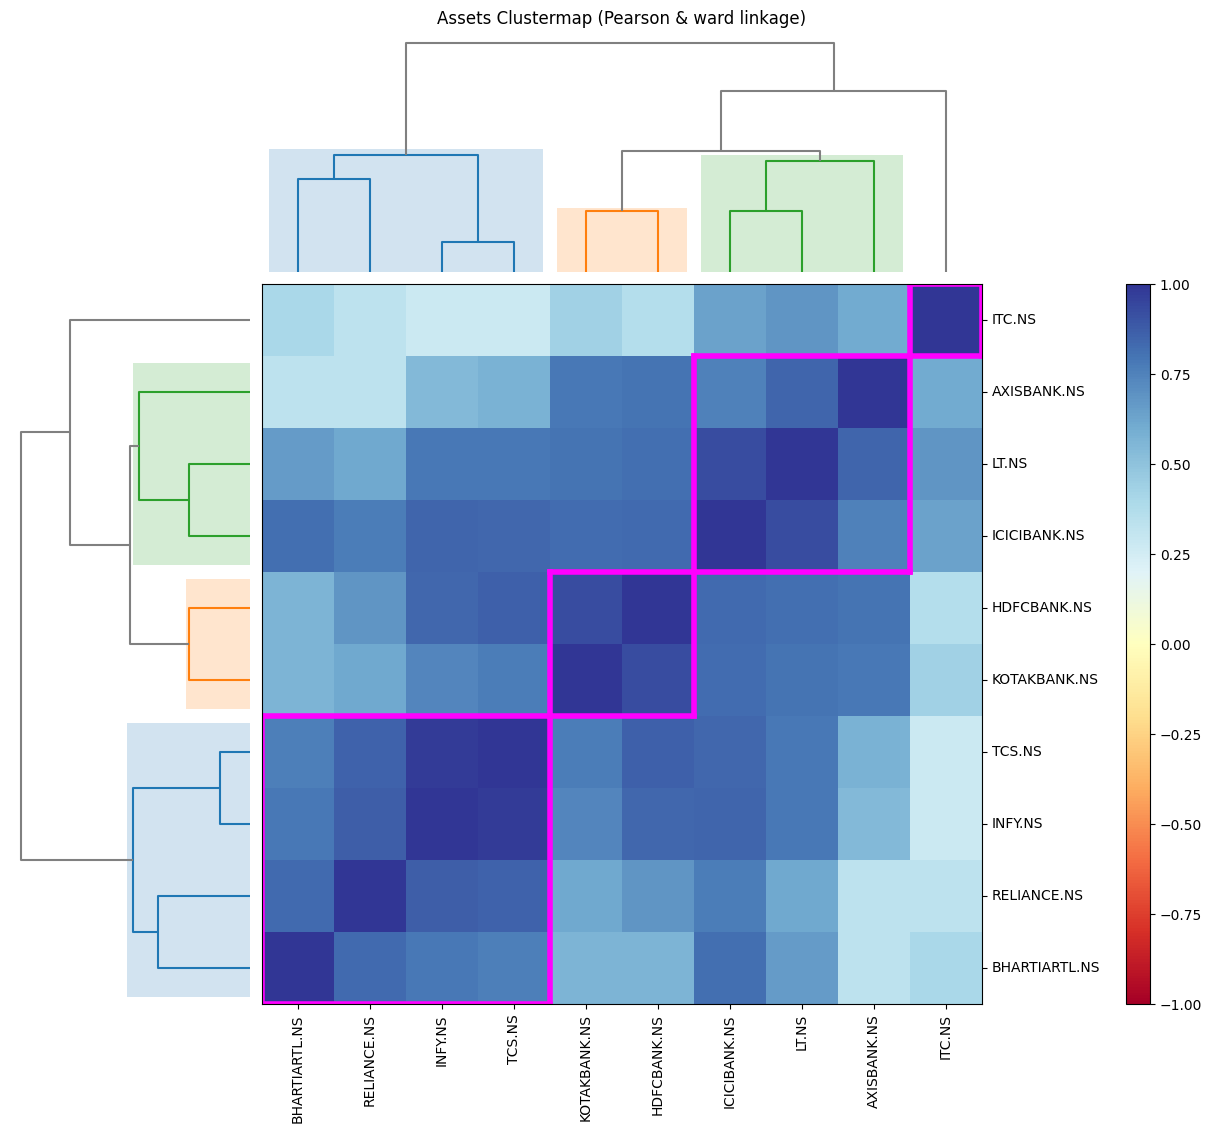

In [16]:
import riskfolio as rp
ax = rp.plot_clusters(returns=X_train,
                       codependence='pearson',
                       linkage='ward',
                       k=None,
                       max_k=10,
                       leaf_order=True,
                       dendrogram=True,
                       #linecolor='tab:purple',
                       ax=None)

In [17]:
# Building the portfolio object
port = rp.HCPortfolio(returns=X_train)

# Estimate optimal portfolio:

model='HRP' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w)

,weights
HDFCBANK.NS,0.029044
RELIANCE.NS,0.003808
ICICIBANK.NS,0.022584
INFY.NS,0.007362
ITC.NS,0.776263
LT.NS,0.009899
TCS.NS,0.002772
AXISBANK.NS,0.081241
KOTAKBANK.NS,0.011952
BHARTIARTL.NS,0.055075


In [18]:
w_HRP=w.reset_index().rename(columns={'index':'Stocks','weights':'HRP'})

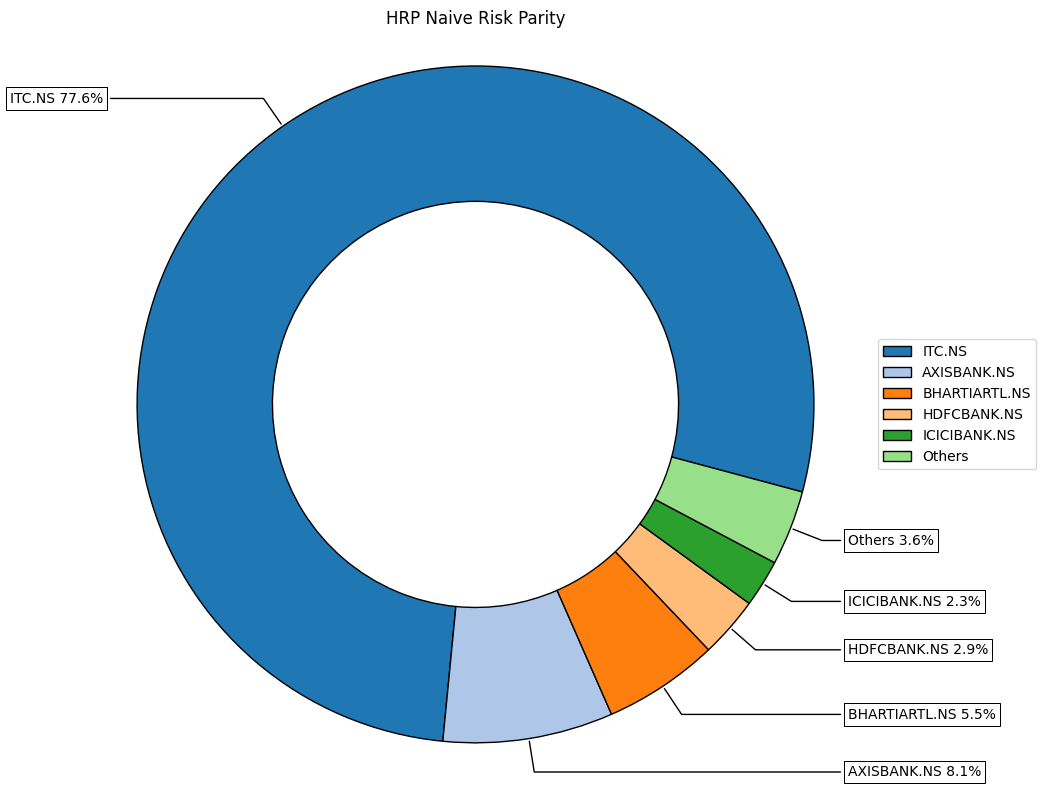

In [19]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

In [20]:
# Building the portfolio object
port = rp.HCPortfolio(returns=X_train)

# Estimate optimal portfolio:

model='HERC' # Could be HRP or HERC
codependence = 'pearson' # Correlation matrix used to group assets in clusters
rm = 'MV' # Risk measure used, this time will be variance
rf = 0 # Risk free rate
linkage = 'single' # Linkage method used to build clusters
max_k = 10 # Max number of clusters used in two difference gap statistic, only for HERC model
leaf_order = True # Consider optimal order of leafs in dendrogram

w2 = port.optimization(model=model,
                      codependence=codependence,
                      rm=rm,
                      rf=rf,
                      linkage=linkage,
                      max_k=max_k,
                      leaf_order=leaf_order)

display(w2)

,weights
HDFCBANK.NS,0.000244
RELIANCE.NS,0.000042
ICICIBANK.NS,0.000340
INFY.NS,0.000058
ITC.NS,0.979580
LT.NS,0.000083
TCS.NS,0.000023
AXISBANK.NS,0.002962
KOTAKBANK.NS,0.000180
BHARTIARTL.NS,0.016487


In [21]:
w_HERC=w2.reset_index().rename(columns={'index':'Stocks','weights':'HERC'})

In [22]:
w_HERC

,Stocks,HERC
0,HDFCBANK.NS,0.000244
1,RELIANCE.NS,0.000042
2,ICICIBANK.NS,0.000340
3,INFY.NS,0.000058
4,ITC.NS,0.979580
5,LT.NS,0.000083
6,TCS.NS,0.000023
7,AXISBANK.NS,0.002962
8,KOTAKBANK.NS,0.000180
9,BHARTIARTL.NS,0.016487


In [23]:
w_HRP

,Stocks,HRP
0,HDFCBANK.NS,0.029044
1,RELIANCE.NS,0.003808
2,ICICIBANK.NS,0.022584
3,INFY.NS,0.007362
4,ITC.NS,0.776263
5,LT.NS,0.009899
6,TCS.NS,0.002772
7,AXISBANK.NS,0.081241
8,KOTAKBANK.NS,0.011952
9,BHARTIARTL.NS,0.055075


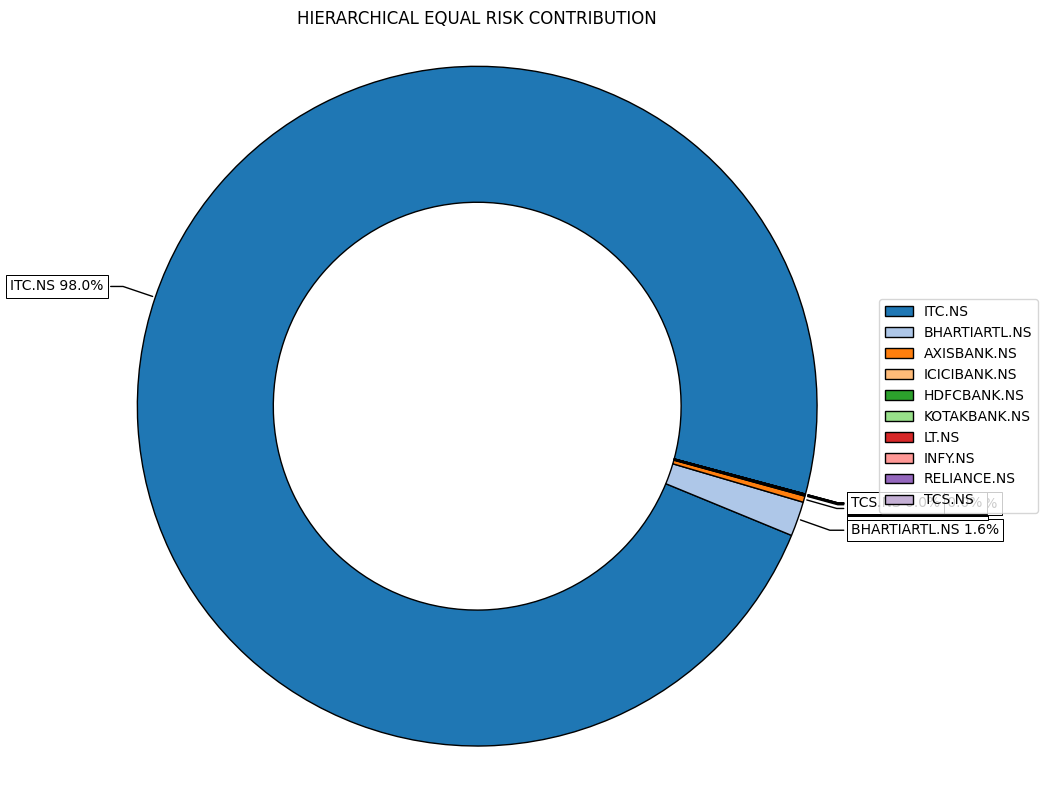

In [24]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w2,
                 title='HIERARCHICAL EQUAL RISK CONTRIBUTION',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None)

## Performance evaluation of the portfolios


In [25]:
portfolios=pd.merge(w_HRP,w_HERC,on='Stocks')

In [26]:
portfolios

,Stocks,HRP,HERC
0,HDFCBANK.NS,0.029044,0.000244
1,RELIANCE.NS,0.003808,0.000042
2,ICICIBANK.NS,0.022584,0.000340
3,INFY.NS,0.007362,0.000058
4,ITC.NS,0.776263,0.979580
5,LT.NS,0.009899,0.000083
6,TCS.NS,0.002772,0.000023
7,AXISBANK.NS,0.081241,0.002962
8,KOTAKBANK.NS,0.011952,0.000180
9,BHARTIARTL.NS,0.055075,0.016487


In [27]:
portfolios=portfolios.set_index('Stocks')

In [28]:
portfolios

,HRP,HERC
Stocks,,
HDFCBANK.NS,0.029044,0.000244
RELIANCE.NS,0.003808,0.000042
ICICIBANK.NS,0.022584,0.000340
INFY.NS,0.007362,0.000058
ITC.NS,0.776263,0.979580
LT.NS,0.009899,0.000083
TCS.NS,0.002772,0.000023
AXISBANK.NS,0.081241,0.002962
KOTAKBANK.NS,0.011952,0.000180


In [29]:
Insample_Result=pd.DataFrame(np.dot(returns,np.array(portfolios)), \
                             columns=['HRP', 'HERC'], index = returns.index)
OutOfSample_Result=pd.DataFrame(np.dot(returns_test,np.array(portfolios)), \
                                columns=['HRP', 'HERC'], index = returns_test.index)

<Axes: ylabel='Return'>

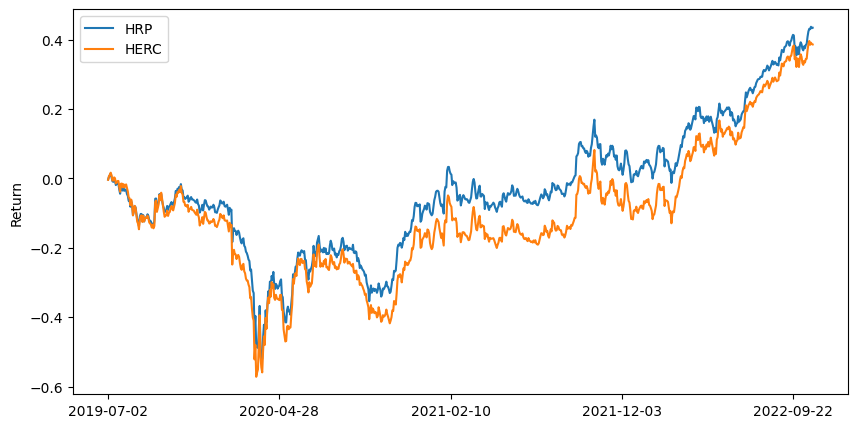

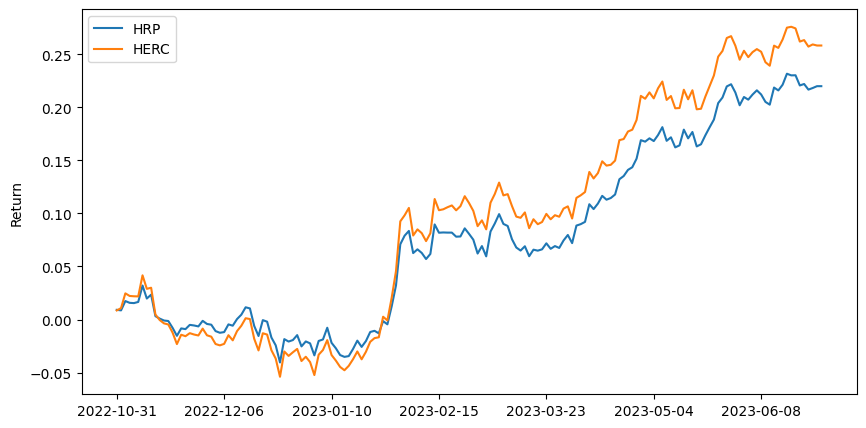

In [30]:
Insample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")
OutOfSample_Result.cumsum().plot(figsize=(10, 5), ylabel = "Return")

In [31]:
ret_insample=Insample_Result.mean() * 252
ret_insample

HRP     0.132929
HERC    0.118193
dtype: float64

In [32]:
ret_out_of_sample = OutOfSample_Result.mean() * 252
ret_out_of_sample

HRP     0.335943
HERC    0.394486
dtype: float64

## SHARP RATIO AND ANUAL VOLATILITY

In [33]:
#In_sample Results
stddev = Insample_Result.std() * np.sqrt(252)
sharp_ratio = (Insample_Result.mean()*np.sqrt(252))/(Insample_Result).std()
Results = pd.DataFrame(dict(stdev=stddev, sharp_ratio = sharp_ratio))
Results

,stdev,sharp_ratio
HRP,0.264776,0.502044
HERC,0.293733,0.402384


In [34]:
#Outof_sample Results
stddev_oos = OutOfSample_Result.std() * np.sqrt(252)
sharp_ratio_oos = (OutOfSample_Result.mean()*np.sqrt(252))/(OutOfSample_Result).std()
Results_oos = pd.DataFrame(dict(stdev_oos=stddev_oos, sharp_ratio_oos = sharp_ratio_oos))
Results_oos

,stdev_oos,sharp_ratio_oos
HRP,0.141640,2.371814
HERC,0.169298,2.330136
